In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [14]:
pd.set_option('display.max_columns', None)


In [15]:
df = pd.read_csv('../custom_data/Apply-RecruiterAction-PremiumUsers 1.csv')

/tmp/ipykernel_8307/310075372.py:1: DtypeWarning: Columns (5,7,9,14,17,19,22,28,42,43,44,45,46,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../custom_data/Apply-RecruiterAction-PremiumUsers 1.csv')


In [16]:
df.columns

Index(['passingYear', 'expYear', 'functionalArea_id', 'currentDesignation',
       'institute_name', 'institute_id', 'currentOrganization_name',
       'currentOrganization_id', 'industry_name', 'industry_id', 'userId',
       'expectedCtc', 'currentCtc', 'currentLocation_name',
       'currentLocation_id', 'jobId', 'timestamp', 'jobseekerId', 'refcode',
       'position', 'premium', 'designation', 'minExp', 'maxExp',
       'brandJobFlag', 'companyName', 'title', 'location', 'category',
       'functionalArea', 'minSal', 'maxSal', 'recruiterId', 'recruiterActions',
       'applicationId', 'result_1_applicationId', 'result_1_action_id',
       'preferredLocation_0', 'preferredLocation_1', 'preferredLocation_2',
       'preferredLocation_3', 'preferredLocation_4', 'preferredLocation_5',
       'preferredLocation_6', 'preferredLocation_7', 'preferredLocation_8',
       'preferredLocation_9', 'rActions_result_1_0', 'rActions_result_1_1',
       'rActions_result_1_2', 'rActions_result_1_3'

In [18]:
df[['passingYear', 'expYear', 'functionalArea_id', 'currentDesignation', 'institute_name', 'institute_id', 'currentOrganization_name',
       'currentOrganization_id', 'industry_name', 'industry_id', 'userId',
       'expectedCtc', 'currentCtc', 'currentLocation_name',
       'currentLocation_id', 'jobId', 'timestamp', 'jobseekerId', 'refcode',
       'position', 'premium', 'designation', 'minExp', 'maxExp',
       'brandJobFlag', 'companyName', 'title', 'location', 'category',
       'functionalArea', 'minSal', 'maxSal', 'recruiterId','recruiterActions',
       'applicationId','result_1_applicationId','result_1_action_id',
       'preferredLocation_0', 'preferredLocation_1', 'preferredLocation_2',
       'preferredLocation_3', 'preferredLocation_4', 'preferredLocation_5',
       'preferredLocation_6', 'preferredLocation_7', 'preferredLocation_8',
       'preferredLocation_9']]

,passingYear,expYear,functionalArea_id,currentDesignation,institute_name,institute_id,currentOrganization_name,currentOrganization_id,industry_name,industry_id,userId,expectedCtc,currentCtc,currentLocation_name,currentLocation_id,jobId,timestamp,jobseekerId,refcode,position,premium,designation,minExp,maxExp,brandJobFlag,companyName,title,location,category,functionalArea,minSal,maxSal,recruiterId,recruiterActions,applicationId,result_1_applicationId,result_1_action_id,preferredLocation_0,preferredLocation_1,preferredLocation_2,preferredLocation_3,preferredLocation_4,preferredLocation_5,preferredLocation_6,preferredLocation_7,preferredLocation_8,preferredLocation_9
0,2022,0,12,NaN,"VIT University, Vellore",152,NaN,-1,IT,1,2955601,5,1,Delhi,221,1258991,2023-12-26T03:34:53.486,2955601,kp,15.0,0.0,Technical Product Manager,0,1,0,Factwise,FactWise - Technical Product Manager - Roadmap...,Mumbai,12,4,4,6,150659,291,38922562,38922562,2,"{'name': 'Anywhere', 'id': 213}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,0,12,NaN,"VIT University, Vellore",152,NaN,-1,IT,1,2955601,5,1,Delhi,221,1278830,2023-12-29T06:17:23.562,2955601,jf_ml,11.0,0.0,Business Analyst,0,2,0,SPIRAEA SERVICES PRIVATE LIMITED,Spiraea - Business Analyst - Python/SQL (0-2 yrs),Delhi,13,13,4,8,144059,0,39003182,39003182,2,"{'name': 'Anywhere', 'id': 213}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,4,13,Business Analyst,"National Institute of Technology, Warangal (NITW)",136,Tavant Technologies,-1,IT,1,2819828,15,9,Noida,9,1277575,2023-12-25T03:36:32.967,2819828,recom_ev_ml,NaN,0.0,Business Analyst,2,6,0,NITS Solutions,NITS Solutions - Business Analyst - Project Ma...,Others,13,4,5,12,69692,790,38897844,38897844,4,"{'name': 'Noida', 'id': 9}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2,16,SOFTWARE ENGINEER,"Indian Institute of Technology, Delhi (IITD)",8,RXLOGIX COPORATION,-1,IT,1,2321372,18,12,Noida,9,1280130,2023-12-22T10:02:21.315,2321372,rl,NaN,0.0,Artificial Intelligence/Machine Learning Engineer,3,4,0,Thanks Buddy,Artificial Intelligence/Machine Learning Engin...,Anywhere in India/Multiple Locations,7,31,30,35,151285,0,38858031,38858031,5,"{'name': 'Anywhere', 'id': 213}","{'name': 'Hyderabad', 'id': 6}","{'name': 'Mumbai', 'id': 8}","{'name': 'Pune', 'id': 10}",NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2,16,SOFTWARE ENGINEER,"Indian Institute of Technology, Delhi (IITD)",8,RXLOGIX COPORATION,-1,IT,1,2321372,18,12,Noida,9,1274501,2023-12-22T10:23:19.777,2321372,rl_aj_list_prm,NaN,0.0,Java developer,2,8,0,Loylogic Technologies,Loylogic Technologies - Java Developer - Solut...,Pune,1,18,7,25,69744,206,38858982,38858982,2,"{'name': 'Anywhere', 'id': 213}","{'name': 'Hyderabad', 'id': 6}","{'name': 'Mumbai', 'id': 8}","{'name': 'Pune', 'id': 10}",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83415,0,4,5,NaN,NaN,-1,NaN,-1,IT-Software / Software Services,52,1655219,10,8,Bengaluru / Bangalore,2,1284731,2024-01-16T11:12:20.586,1655219,jf_ml,19.0,0.0,Quality Analyst,2,5,0,SAMTA INFOTECH PRIVATE LIMITED,Samta - Quality Analyst - Automation/Performan...,Noida,11,5,12,18,158741,0,39505341,39505341,4,"{'name': 'Bengaluru / Bangalore', 'id': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83416,0,4,5,NaN,NaN,-1,NaN,-1,IT-Software / Software Services,52,1655219,10,8,Bengaluru / Bangalore,2,1287202,2024-01-16T11:41:19.113,1655219,sp,1.0,0.0,API Connect,6,10,0,Optivalue tek consulting,API Connect Engineer - Middleware Technologies...,Bangalore,8,15,15,22,169917,0,39506723,39506723,4,"{'name': 'Bengaluru / Bangalore', 'id': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83417,0,4,5,NaN,NaN,-1,NaN,-1,IT-Software / Software Services,52,1655219,10,8,Bengaluru / Bangalore,2,1284964,2024-01-22T08:56:18.518,1655219,sp,18.0,0.0,Quality Assurance Manager,10,15,0,Zinrelo,Zinrelo - Quality Assurance Manager - Manual/A...,Pune,11,5,20,40,174905,0,396704

In [6]:
df.isnull().sum()

passingYear                 0
expYear                     0
functionalArea_id           0
currentDesignation      25296
institute_name           8530
                        ...  
rActions_result_1_17    83418
rActions_result_1_18    83419
rActions_result_1_19    83419
rActions_result_1_20    83419
rActions_result_1_21    83419
Length: 69, dtype: int64

In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  18


,passingYear,expYear,functionalArea_id,userId,expectedCtc,currentCtc,jobId,premium,maxExp,brandJobFlag,functionalArea,minSal,maxSal,recruiterId,recruiterActions,applicationId,result_1_applicationId,result_1_action_id
0,2022,0,12,2955601,5,1,1258991,0.0,1,0,4,4,6,150659,291,38922562,38922562,2
1,2022,0,12,2955601,5,1,1278830,0.0,2,0,13,4,8,144059,0,39003182,39003182,2
2,2019,4,13,2819828,15,9,1277575,0.0,6,0,4,5,12,69692,790,38897844,38897844,4
3,2021,2,16,2321372,18,12,1280130,0.0,4,0,31,30,35,151285,0,38858031,38858031,5
4,2021,2,16,2321372,18,12,1274501,0.0,8,0,18,7,25,69744,206,38858982,38858982,2


In [37]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of numerical variables: ', len(categorical_features))

df[categorical_features].head()

Number of numerical variables:  51


,currentDesignation,institute_name,institute_id,currentOrganization_name,currentOrganization_id,industry_name,industry_id,currentLocation_name,currentLocation_id,timestamp,jobseekerId,refcode,position,designation,minExp,companyName,title,location,category,preferredLocation_0,preferredLocation_1,preferredLocation_2,preferredLocation_3,preferredLocation_4,preferredLocation_5,preferredLocation_6,preferredLocation_7,preferredLocation_8,preferredLocation_9,rActions_result_1_0,rActions_result_1_1,rActions_result_1_2,rActions_result_1_3,rActions_result_1_4,rActions_result_1_5,rActions_result_1_6,rActions_result_1_7,rActions_result_1_8,rActions_result_1_9,rActions_result_1_10,rActions_result_1_11,rActions_result_1_12,rActions_result_1_13,rActions_result_1_14,rActions_result_1_15,rActions_result_1_16,rActions_result_1_17,rActions_result_1_18,rActions_result_1_19,rActions_result_1_20,rActions_result_1_21
0,NaN,"VIT University, Vellore",152,NaN,-1,IT,1,Delhi,221,2023-12-26T03:34:53.486,2955601,kp,15.0,Technical Product Manager,0,Factwise,FactWise - Technical Product Manager - Roadmap...,Mumbai,12,"{'name': 'Anywhere', 'id': 213}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'applicationId': 38922562, 'action_id': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"VIT University, Vellore",152,NaN,-1,IT,1,Delhi,221,2023-12-29T06:17:23.562,2955601,jf_ml,11.0,Business Analyst,0,SPIRAEA SERVICES PRIVATE LIMITED,Spiraea - Business Analyst - Python/SQL (0-2 yrs),Delhi,13,"{'name': 'Anywhere', 'id': 213}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'applicationId': 39003182, 'action_id': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Business Analyst,"National Institute of Technology, Warangal (NITW)",136,Tavant Technologies,-1,IT,1,Noida,9,2023-12-25T03:36:32.967,2819828,recom_ev_ml,NaN,Business Analyst,2,NITS Solutions,NITS Solutions - Business Analyst - Project Ma...,Others,13,"{'name': 'Noida', 'id': 9}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'applicationId': 38897844, 'action_id': 4}","{'applicationId': 38897844, 'action_id': 5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOFTWARE ENGINEER,"Indian Institute of Technology, Delhi (IITD)",8,RXLOGIX COPORATION,-1,IT,1,Noida,9,2023-12-22T10:02:21.315,2321372,rl,NaN,Artificial Intelligence/Machine Learning Engineer,3,Thanks Buddy,Artificial Intelligence/Machine Learning Engin...,Anywhere in India/Multiple Locations,7,"{'name': 'Anywhere', 'id': 213}","{'name': 'Hyderabad', 'id': 6}","{'name': 'Mumbai', 'id': 8}","{'name': 'Pune', 'id': 10}",NaN,NaN,NaN,NaN,NaN,NaN,"{'applicationId': 38858031, 'action_id': 5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SOFTWARE ENGINEER,"Indian Institute of Technology, Delhi (IITD)",8,RXLOGIX COPORATION,-1,IT,1,Noida,9,2023-12-22T10:23:19.777,2321372,rl_aj_list_prm,NaN,Java developer,2,Loylogic Technologies,Loylogic Technologies - Java Developer - Solut...,Pune,1,"{'name': 'Anywhere', 'id': 213}","{'name': 'Hyderabad', 'id': 6}","{'name': 'Mumbai', 'id': 8}","{'name': 'Pune', 'id': 10}",NaN,NaN,NaN,NaN,NaN,NaN,"{'applicationId': 38858982, 'action_id': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
numerical_features

['passingYear',
 'expYear',
 'functionalArea_id',
 'userId',
 'expectedCtc',
 'currentCtc',
 'jobId',
 'premium',
 'maxExp',
 'brandJobFlag',
 'functionalArea',
 'minSal',
 'maxSal',
 'recruiterId',
 'recruiterActions',
 'applicationId',
 'result_1_applicationId',
 'result_1_action_id']

In [42]:
dfn = df[numerical_features]

In [45]:
dfn.isnull().sum()

passingYear               0
expYear                   0
functionalArea_id         0
userId                    0
expectedCtc               0
currentCtc                0
jobId                     0
premium                   8
maxExp                    0
brandJobFlag              0
functionalArea            0
minSal                    0
maxSal                    0
recruiterId               0
recruiterActions          0
applicationId             0
result_1_applicationId    0
result_1_action_id        0
dtype: int64

In [43]:
dfc = df[categorical_features]

In [30]:
for feature in numerical_features:
  data=df.copy()
  data[feature] = np.where(data[feature])
  data.groupby(feature)['functionalArea'].median().plot.bar()
  plt.title(feature)
  plt.show()

ValueError: Length of values (1) does not match length of index (83420)

<Axes: xlabel='recruiterActions'>

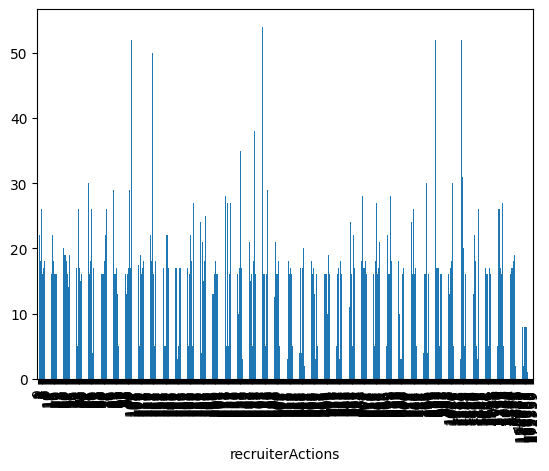

In [47]:

dfn.groupby('recruiterActions')['functionalArea'].median().plot.bar()
